In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Time variable
t = np.arange(0, 15, 0.01)

In [13]:
# Desired trajectory parameters
T = 15
Tsq = T**2
Tcb = T**3

In [14]:
# Matrix A for trajectory coefficients
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, Tsq, Tcb, 0, 0, 0, 0],
    [0, 1, 2*T, 3*Tsq, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, Tsq, Tcb],
    [0, 0, 0, 0, 0, 1, 2*T, 3*Tsq]
])

In [15]:
# Vector b for trajectory coefficients
b = np.array([
    [0],
    [0],
    [0],
    [-0.5],
    [5],
    [0],
    [5],
    [-0.5]
])

In [16]:
# Calculate pseudo-inverse of A and coefficients
A_inv = np.linalg.pinv(A)
x = np.matmul(A_inv, b)

In [17]:
# Extract coefficients
a11, a12, a13, a14 = x[:4]
a21, a22, a23, a24 = x[4:8]

In [18]:
# Calculate desired trajectory
X_d = a11 + a12 * t + a13 * t**2 + a14 * t**3
Y_d = a21 + a22 * t + a23 * t**2 + a24 * t**3
dX_d = np.gradient(X_d, t)
dY_d = np.gradient(Y_d, t)
ddX_d = np.gradient(dX_d, t)
ddY_d = np.gradient(dY_d, t)

In [19]:
# Initialize robot state
x = X_d[0]
y = Y_d[0]
theta = np.arctan2(dY_d[0], dX_d[0])
V = np.sqrt(dX_d[0]**2 + dY_d[0]**2)

In [20]:
# Gain values
k_px, k_py = 1, 1
k_dx, k_dy = 2, 2

In [21]:
# Noise levels for velocity and angle
noise_std_v = 0.01
noise_std_theta = 0.001

In [22]:
# Generate noise
noise_v = np.random.normal(0, noise_std_v, len(t))
noise_theta = np.random.normal(0, noise_std_theta, len(t))

In [23]:
# Lists to store the robot's trajectory
x_states = [x]
y_states = [y]

In [24]:
# Closed-loop control simulation
for i in range(1, len(t)):
    dt = t[i] - t[i - 1]

    # Compute errors
    ex = x - X_d[i]
    ey = y - Y_d[i]
    edx = V * np.cos(theta) - dX_d[i]
    edy = V * np.sin(theta) - dY_d[i]

    # Closed-loop control
    a = ddX_d[i] - k_px * ex - k_dx * edx
    omega = ddY_d[i] - k_py * ey - k_dy * edy

    # Add noise
    a += noise_v[i]
    omega += noise_theta[i]

    # Update states
    x += V * np.cos(theta) * dt
    y += V * np.sin(theta) * dt
    theta += omega * dt
    V += a * dt

    # Store the states
    x_states.append(x)
    y_states.append(y)

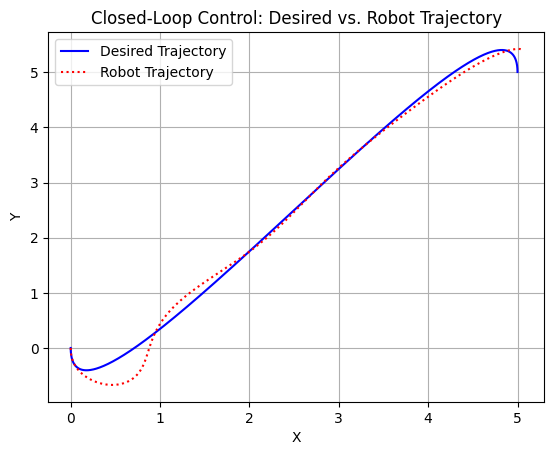

In [25]:
# Plot results
plt.figure()
plt.plot(X_d, Y_d, label="Desired Trajectory", color='blue')
plt.plot(x_states, y_states, label="Robot Trajectory", linestyle='dotted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Closed-Loop Control: Desired vs. Robot Trajectory')
plt.grid(True)
plt.show()